## Notebook imports

In [76]:
# importing all necessery python libraries
from sklearn.datasets  import load_boston   #loading dataset for practice
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  # for split test analysis 

import statsmodels.api  as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import pandas as pd
import matplotlib.pyplot as plt  #VISULIZATION LIBRABRY
import seaborn as sns             #VISULIZATION LIBRABRY
import numpy as np
from math import log 



%matplotlib inline


## Gather Data

[sorce:original]("https://pandas.pydata.org/")


In [77]:

#to know attributes of dataset that we can use directly in our program to collect databoston_dataset = load_boston()
boston_dataset = load_boston()
dir(boston_dataset)



['DESCR', 'data', 'feature_names', 'filename', 'target']

### data points and feature

In [78]:
#to know type of dataset we r going to use
type(boston_dataset.data)



numpy.ndarray

In [79]:
#(506, 13) == (rows, column)
boston_dataset.data.shape
print(boston_dataset.data.shape)   #whole dataset shape in row*columns
print(boston_dataset.feature_names.shape)  # shape of column
print(boston_dataset.target.shape)    # shape of rows target, entries in dataset


(506, 13)
(13,)
(506,)


In [80]:
#getting features list 
print(boston_dataset.feature_names)



['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## data exploration with pandas dataframe

In [81]:
#print(boston_dataset.target)
#storing our dataset into pandaas Dataframeto visUlize and solve correcty

df_boston = pd.DataFrame(boston_dataset.data)
df_boston.columns = boston_dataset.feature_names
df_boston['PRICE'] = boston_dataset.target

In [82]:
#we obseve 1st five entries in dataset
df_boston.head()
df_boston.tail()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [83]:
df_boston.count() #show the no. of row/instances in each column


CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

## cleaning data - cheack for missing values

In [84]:
pd.isnull(df_boston).any()  # cheacking any missing value in any colums

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

In [85]:
df_boston.info()   #this function gives all inforamation regarding the datset like if any null,
                   #no. of rows ech cloumn, datatype etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## data visulization  (DIstributiion and outliers)  Histogram, Distribution, Bar charts

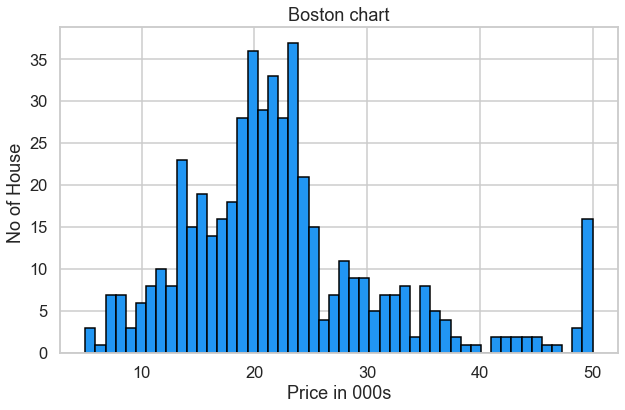

In [86]:
plt.figure(figsize= (10, 6))
plt.hist(df_boston['PRICE'], bins = 50, ec= 'black', color= "#2196F3")
# bins = 3 shows all obsevation in 3 bins/piller,  ec = 'black' gives outline to pillers/bars(edge color)

plt.title('Boston chart')
plt.xlabel('Price in 000s')
plt.ylabel('No of House ')
plt.show()                                           


C:\Users\amar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


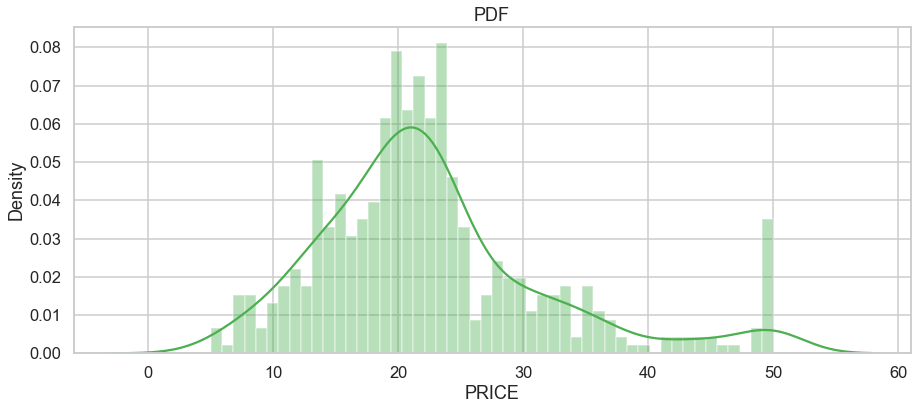

In [87]:
plt.figure(figsize= (15, 6))
sns.distplot(df_boston["PRICE"], bins = 50, color= '#4CAF50', hist= True, kde= True) 
#to ploting probability desity function cureve and histogram together
plt.title('PDF')
plt.show()
#color = display coor of chart, hist= False/True = hiding chart, kde = False/TRue = hiding pdf curve

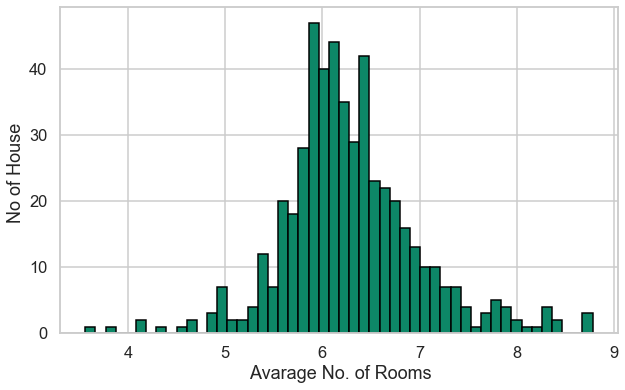

In [88]:
plt.figure(figsize= (10, 6))
plt.hist(df_boston['RM'], bins= 50, ec= 'black', color= "#0d8767")
# bins = 3 shows all obsevation in 3 bins/piller,  ec = 'black' gives outline to pillers/bars


plt.xlabel(' Avarage No. of Rooms')
plt.ylabel('No of House ')


plt.show()

In [89]:
df_boston['RM'].mean()  #finding Average of the no. of rooms using pandas attribute of mean()

6.284634387351787

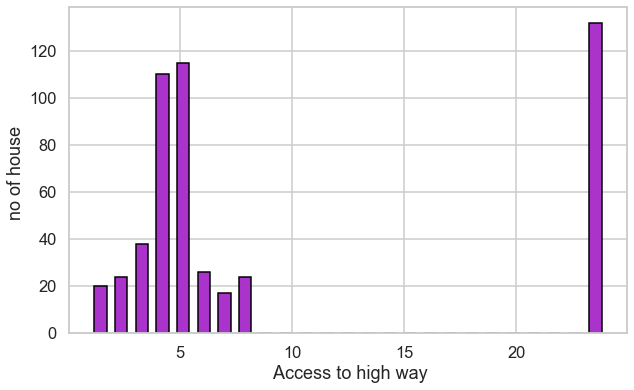

In [90]:
plt.figure(figsize= (10, 6))
plt.hist(df_boston['RAD'], bins= 25, ec= 'black', color= "#aa33cc", rwidth= 0.6)
# bins = 3 shows all obsevation in 3 bins/piller,  ec = 'black' gives outline to pillers/bars
#rwidth= 0.6 = for gap between the bars

plt.xlabel(' Access to high way')
plt.ylabel('no of house ')


plt.show()

In [91]:
df_boston["RAD"].value_counts() # to find any hiiden items in dataset ...if any value reapeating servel times

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

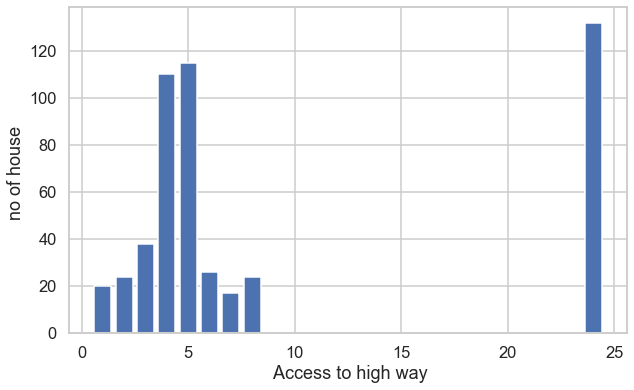

In [92]:
frequency = df_boston["RAD"].value_counts()  #using python code 
# type(frequency)
# frequency.index
# frequency.axes[0]
plt.figure(figsize = (10, 6))

plt.xlabel(' Access to high way')
plt.ylabel('no of house ')
plt.bar(frequency.index, height= frequency)   #ploting bar chart
plt.show()
# adventage of this is we no need to specify any bis it will give all bins correctly

In [93]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [94]:
df_boston['CHAS'].value_counts()

# this is dummyvariable which ususall 1 or 0  like man or woman it will have onlu two values4

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [95]:
df_boston['PRICE'].min()   #minimum value of the coloumn 'price'

5.0

In [96]:
df_boston['PRICE'].max()    #maxximum value of the coloumn 'price'

50.0

In [97]:
df_boston['PRICE'].mean()    #average value of the coloumn 'price'

22.532806324110698

In [98]:
df_boston.min()


CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [99]:
df_boston.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

In [100]:
df_boston.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [101]:
df_boston.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [102]:
df_boston.describe()  #describe the dataset in some parameters median= 50% row

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## CORRELATION
 
## $$ \rho_(xy) = corr(x, y)$$
## $$ -0.1 \leq \rho_(xy) \leq + 1.0 $$

In [103]:
df_boston['PRICE'].corr(df_boston["RM"]) 
#correlation bet property price and no. of rooms


0.6953599470715393

In [104]:
df_boston['PRICE'].corr(df_boston["PTRATIO"])
#correlation between property price and pupil teacher ratio
#correlation of one variable w r t other variabble is called correlation
#POSITIVE CORR>> when one variable increase other variable also increase(two variable move in same direction)
#NEGATIVE>> when one variable increase other variavle decrease(two variable move in oppsite durection)

-0.5077866855375616

In [105]:
df_boston.corr()  #pearson correlation cofficients

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [106]:
mask = np.zeros_like(df_boston.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

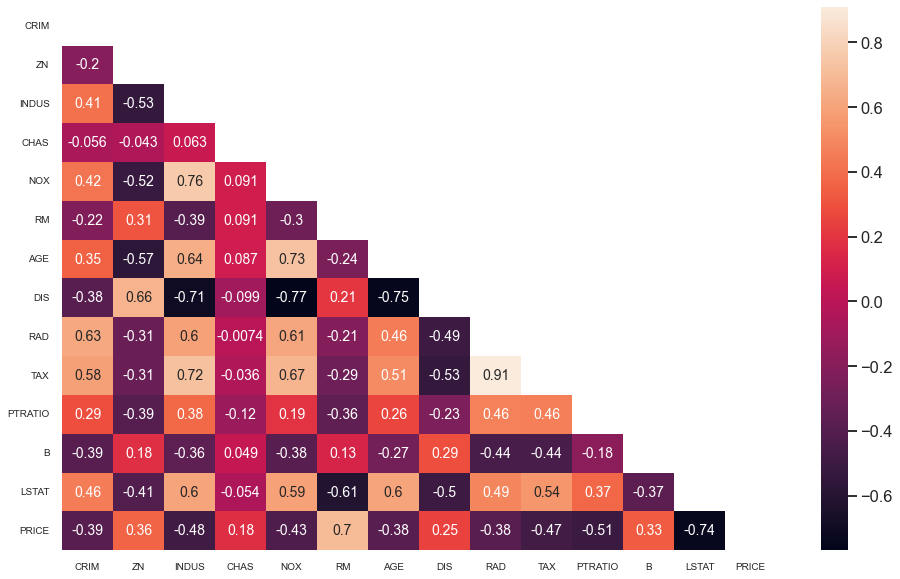

In [107]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_boston.corr(), mask= mask, annot= True, annot_kws= {"size": 14})
# sns.set_style("white")    setting the background color behind the heatmape
plt.xticks(fontsize= 10)
plt.yticks(fontsize= 10)
plt.show()

# mask =is the trianle of aaray
# annot = if we need valuen on box in heatmape
# annot_kws = set the value of annote size or fontsize of the value on the box of heatmap 

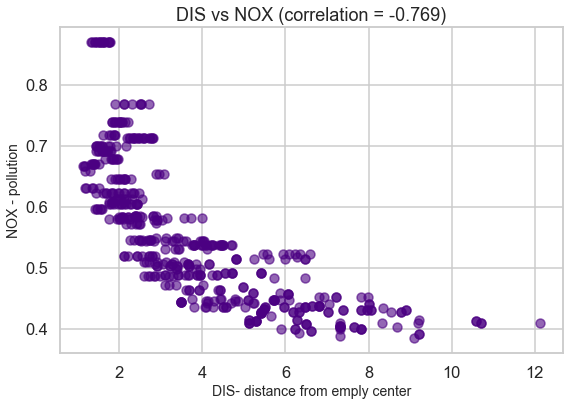

In [108]:

nox_dis_corr = round(df_boston["NOX"].corr(df_boston["DIS"]), 3)

plt.figure(figsize= (9, 6))
plt.scatter(x=df_boston["DIS"], y= df_boston["NOX"], alpha= 0.6, s= 80, color="indigo" )
plt.title(f"DIS vs NOX (correlation = {nox_dis_corr})")
plt.xlabel("DIS- distance from emply center", fontsize= 14)
plt.ylabel("NOX - pollution", fontsize= 14)
plt.show()                                             
        

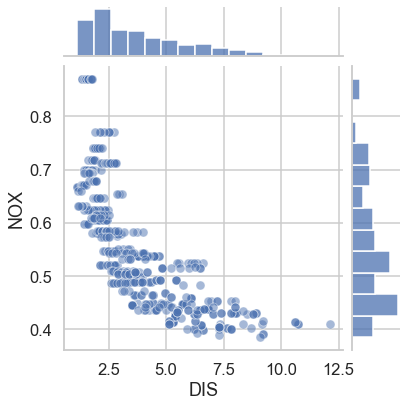

In [109]:
sns.set()  #reset the the privious visulize pattern
sns.set_context("talk")
sns.set_style('whitegrid')  #add color and grid in graph

sns.jointplot(x= df_boston["DIS"], y= df_boston["NOX"], height= 6, joint_kws= {'alpha': 0.5})
plt.show()

#joint_kws=  is used for dot transperency
#height= used for figure size
#

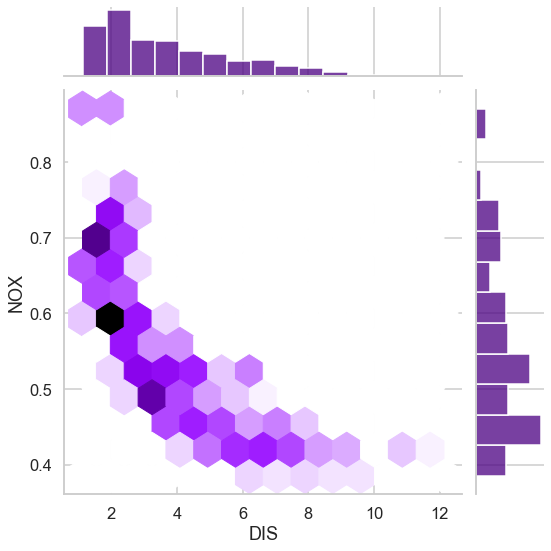

In [110]:
sns.set()  #reset the the privious visulize pattern
sns.set_context("talk")
sns.set_style('whitegrid')  #add color and grid in graph

sns.jointplot(x= df_boston["DIS"], y= df_boston["NOX"], kind= 'hex', height= 8, color= "indigo")
plt.show()

#joint_kws=  is used for dot transperency
#height= used for figure size
#kind = "hex" for hex disply of scatter pklot

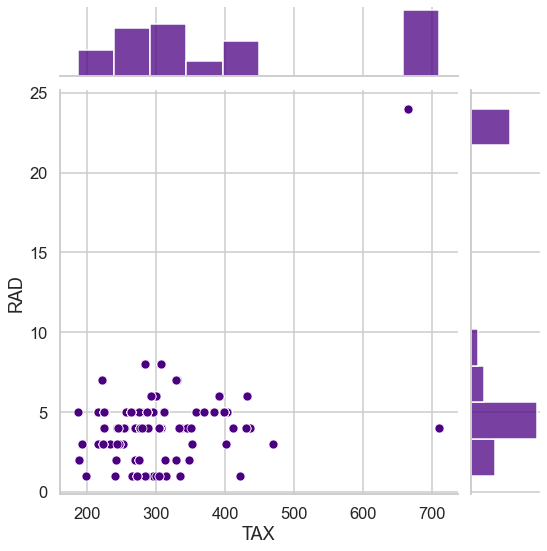

In [111]:
sns.set()  #reset the the privious visulize pattern
sns.set_context("talk")
sns.set_style('whitegrid')  #add color and grid in graph

sns.jointplot(x= df_boston["TAX"], y= df_boston["RAD"], height= 8, color= "indigo")
plt.show()

#in this outliers plts driving the correlation 

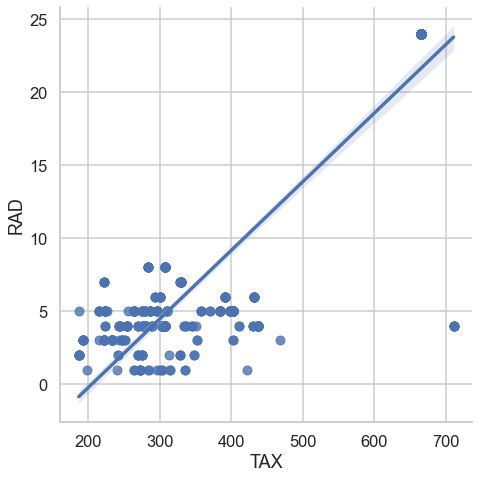

In [112]:
sns.lmplot(x= "TAX", y= "RAD", data= df_boston, height= 7)
plt.show()

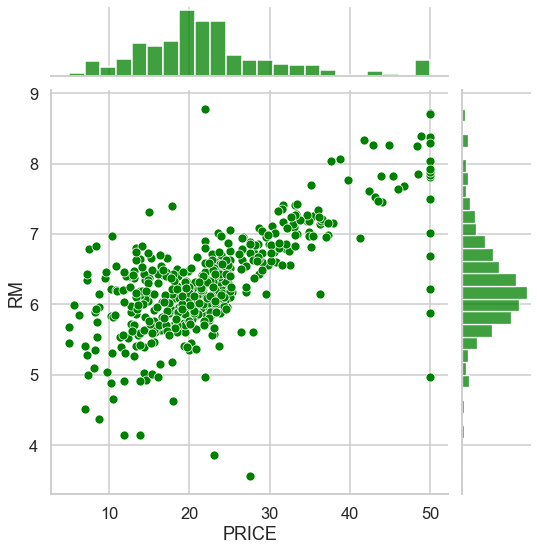

In [113]:
sns.set()  #reset the the privious visulize pattern
sns.set_context("talk")
sns.set_style('whitegrid')  #add color and grid in graph

sns.jointplot(x= df_boston["PRICE"], y= df_boston["RM"], height= 8, color= "green")
plt.show()

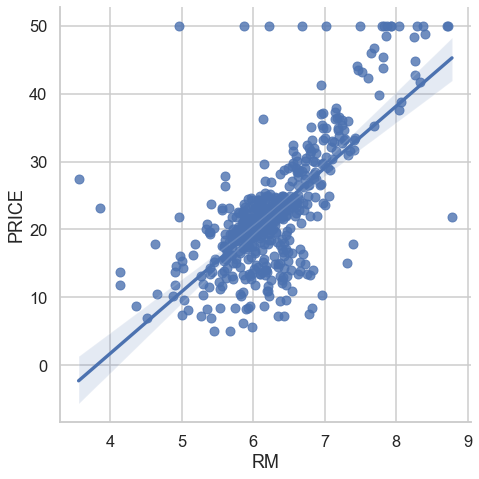

In [114]:
sns.lmplot(x= "RM", y= "PRICE", data= df_boston, height= 7)
plt.show()

# in this kind of plot linear fegression line and our scatter both display at once by this seabrn lmplot() 
#here we see the clear relationship of correlation bet RM and PRICE

In [115]:
# %%time

# sns.pairplot(df_boston)    
# plt.show()

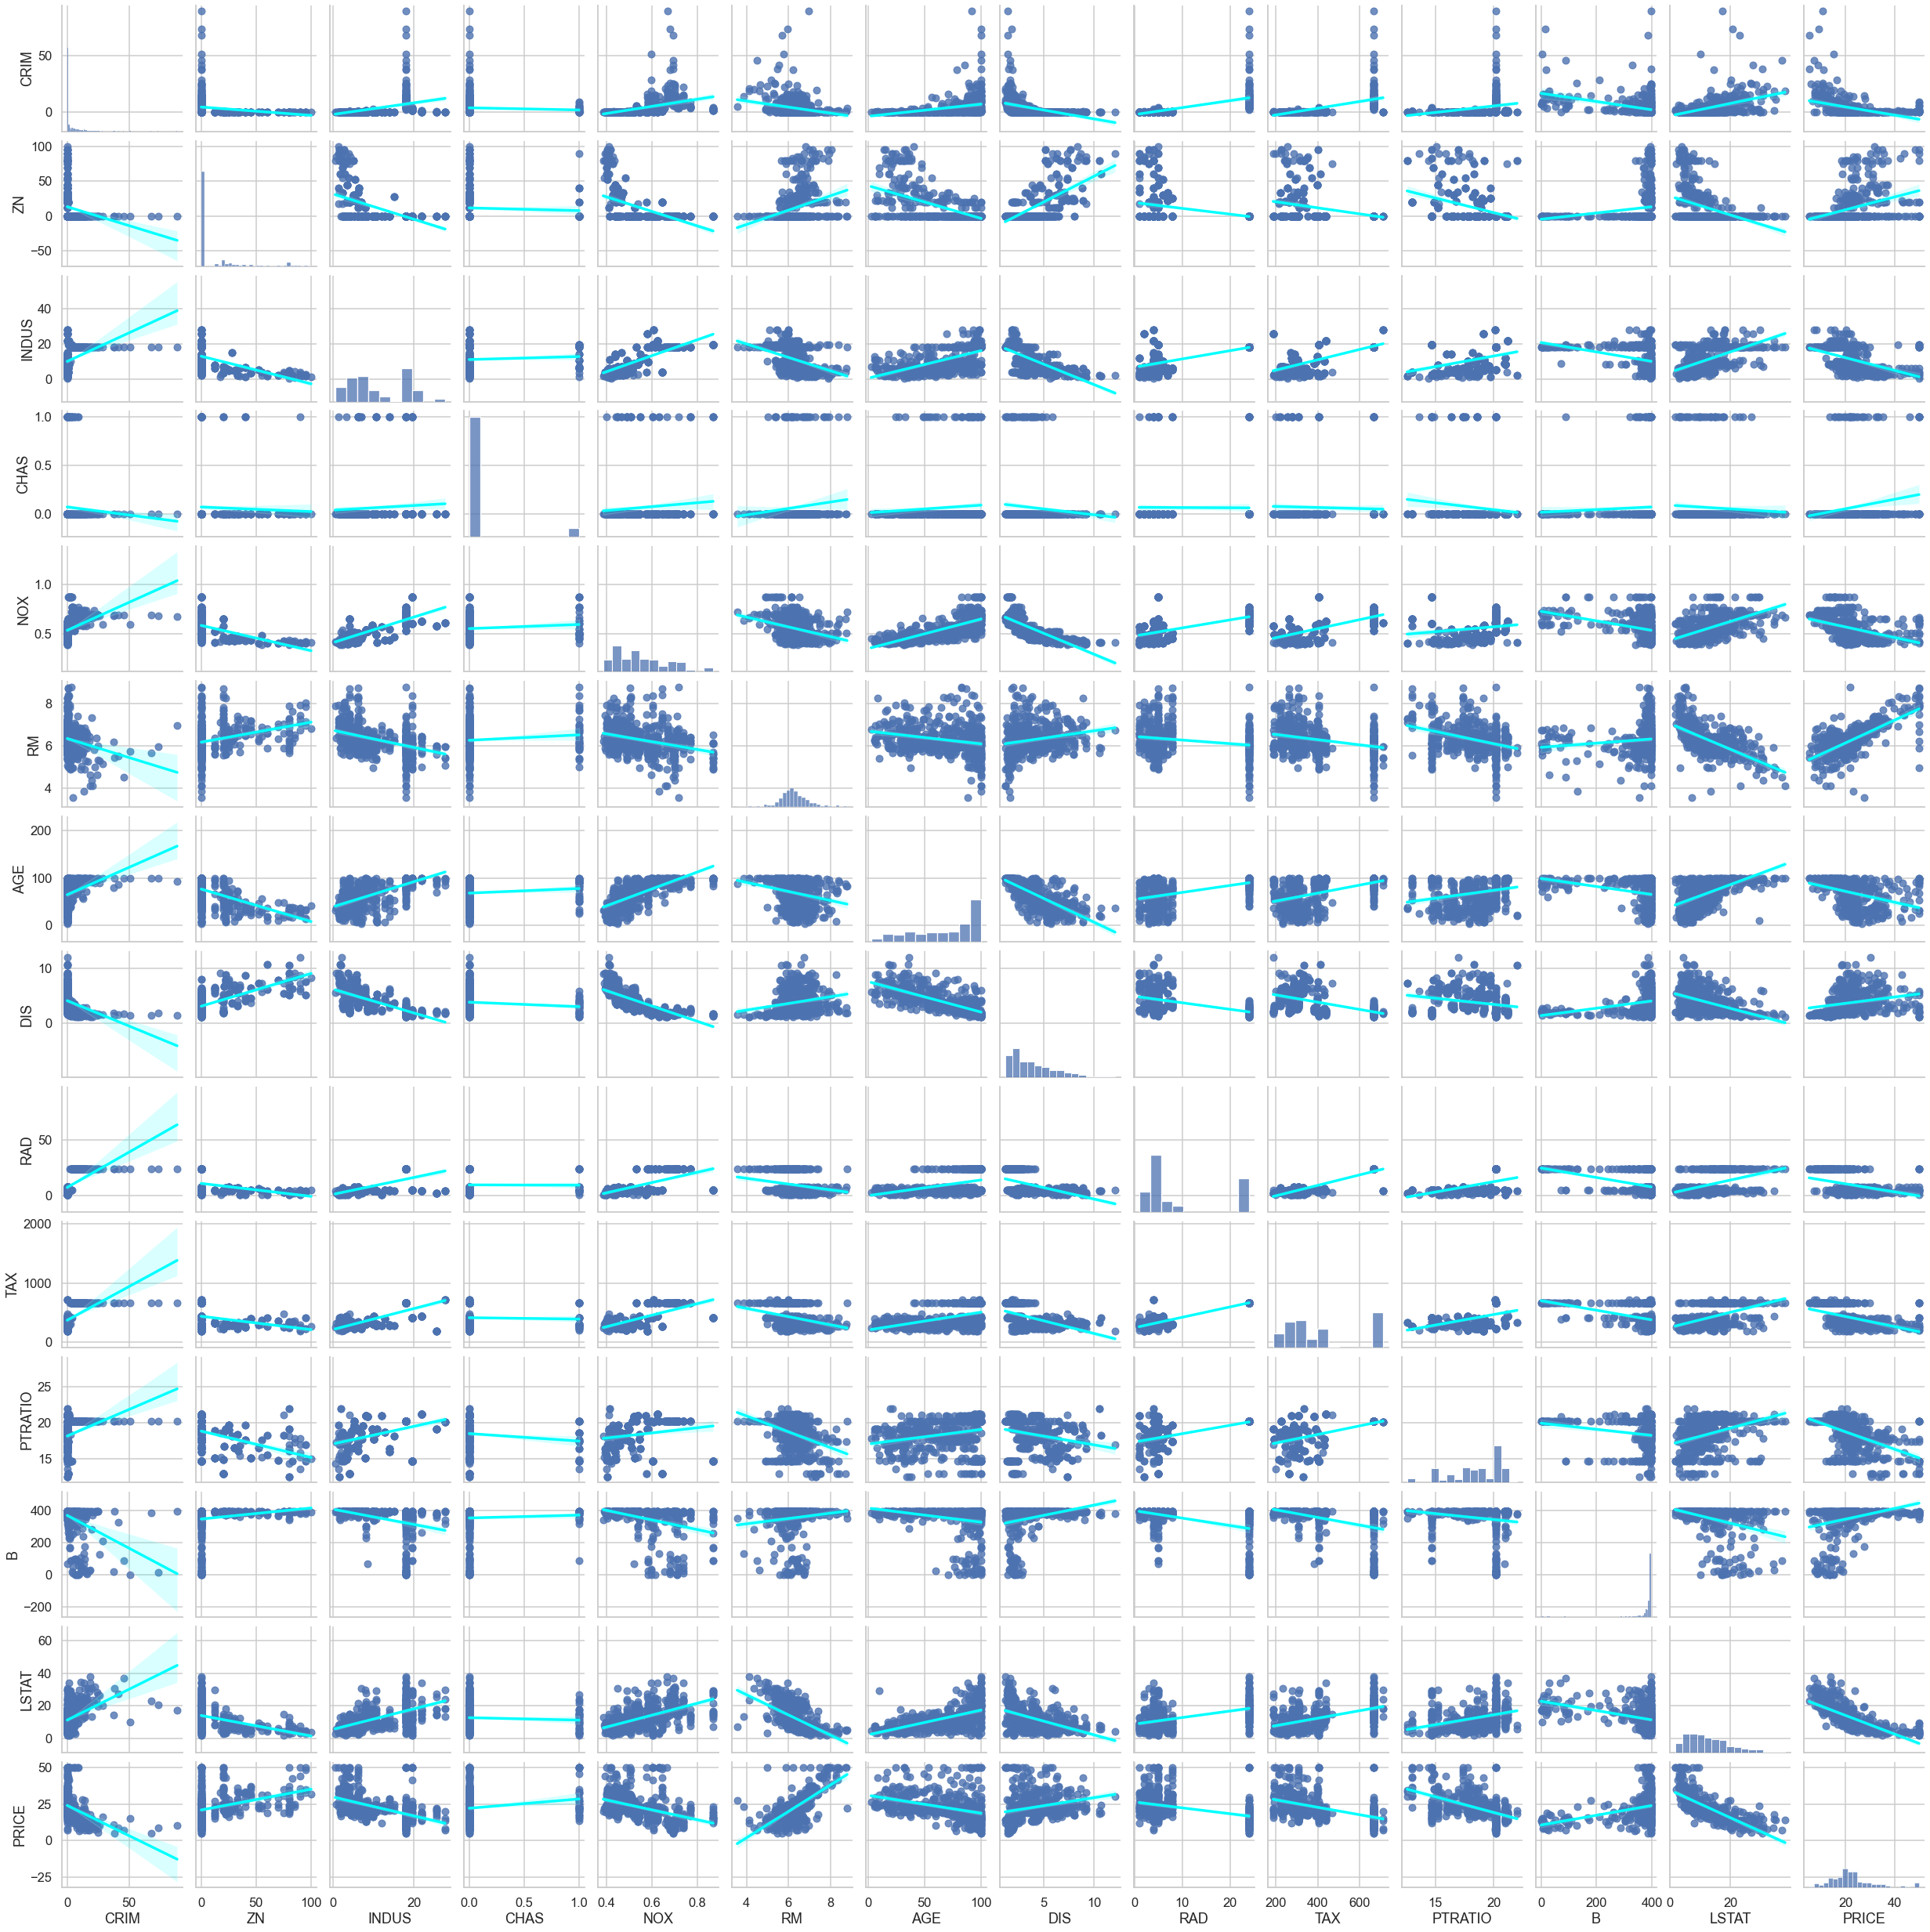

Wall time: 1min 40s


In [116]:
%%time

sns.pairplot(df_boston, kind= 'reg', plot_kws= {'line_kws':{"color": "cyan"}})
plt.show()

 ## Multivariable Regression

In [117]:
prices = df_boston['PRICE']
features = df_boston.drop('PRICE', axis= 1)
#we have to drop a column so for column axis=1 and axis = 0 for row

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size= 0.2, random_state= 10)


#% of training set
len(X_train)/len(features)


# test_size= 0.2>> we declaring test size as 0.2 and train 0.8,
#random_state= 10>> to get good result shffule data 10 times



0.7984189723320159

In [118]:
len(X_test)/len(features)

0.2015810276679842

In [119]:
# % of test dataset
X_test.shape[0]/features.shape[0]
# /features.shape[0]

0.2015810276679842

In [120]:
Y_test

305    28.4
193    31.1
65     23.5
349    26.6
151    19.6
       ... 
208    24.4
174    22.6
108    19.8
242    22.2
102    18.6
Name: PRICE, Length: 102, dtype: float64

## MULTIVARIABLE COFFICIENT

In [121]:
regr = LinearRegression()
regr.fit(X_train, Y_train)


#Print out r-squared for training dataset and test dataset

print('testing data r-squared: ', regr.score(X_test, Y_test))
print('trainig data r-squared: ', regr.score(X_train, Y_train))


print('Intercept', regr.intercept_)  #find Intercept
pd.DataFrame(data= regr.coef_, index = X_train.columns, columns= ['coef']) 

# find all cofficients in the dataset
# columns= ['coef'] = name of the coluns



testing data r-squared:  0.6709339839115638
trainig data r-squared:  0.750121534530608
Intercept 36.53305138282446


,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


## Data Transformation

In [122]:
df_boston['PRICE'].skew()  

#here skew = 1.1 but skew of uniform distrubution is always 0, so we try ti modify and improve our model
#and the will apply regression model to this data

1.1080984082549072

In [123]:
y_log = np.log(df_boston['PRICE'])
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: PRICE, dtype: float64

In [124]:
y_log.skew()

-0.33032129530987864

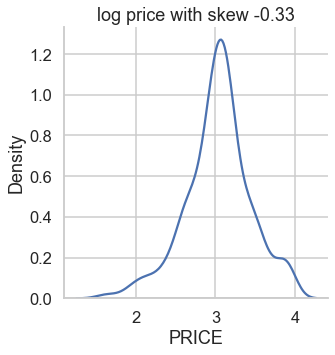

In [125]:
sns.displot(y_log, kind= "kde")
plt.title(f'log price with skew {round(y_log.skew(), 3)}')
plt.show()
#{"hist", "kde", "ecdf"}

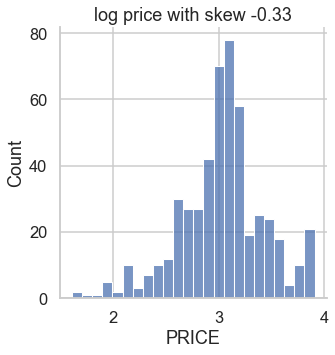

In [126]:
sns.displot(y_log, kind= "hist")
plt.title(f'log price with skew {round(y_log.skew(), 3)}')
plt.show()
#{"hist", "kde", "ecdf"}

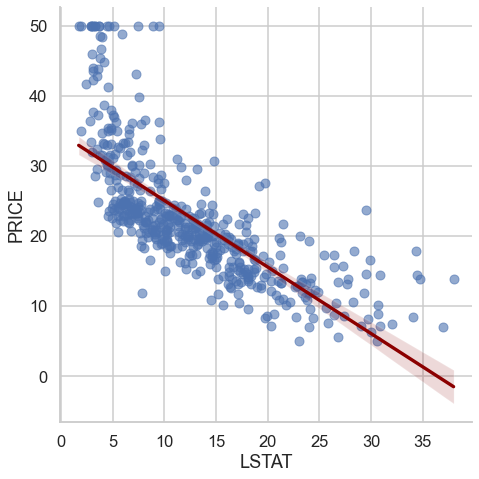

In [127]:
sns.lmplot(x= 'LSTAT', y= 'PRICE', data= df_boston, height= 7,
           scatter_kws= {'alpha': 0.6}, line_kws= {'color': 'darkred'})
plt.show()

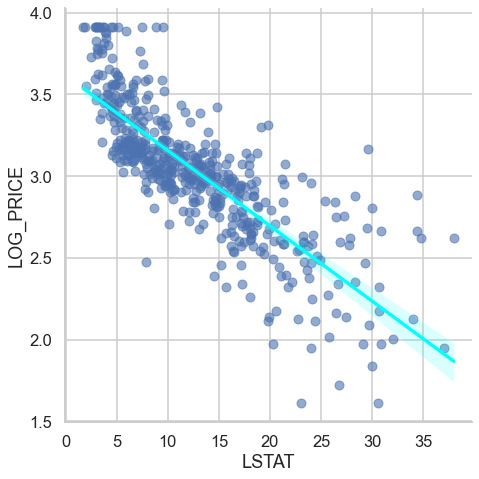

In [128]:
transformed_data= features
transformed_data['LOG_PRICE'] = y_log

sns.lmplot(x= 'LSTAT', y= 'LOG_PRICE', data= transformed_data, height= 7,
           scatter_kws= {'alpha': 0.6}, line_kws= {'color': 'cyan'})
plt.show()

## Regression using log price

In [129]:
prices = np.log(df_boston['PRICE']) #use log
features = df_boston.drop('PRICE', axis= 1)
#we have to drop a column so for column axis=1 and axis = 0 for row

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size= 0.2, random_state= 10)

regr = LinearRegression()
regr.fit(X_train, Y_train)




print('testing data r-squared: ', regr.score(X_test, Y_test))
print('trainig data r-squared: ', regr.score(X_train, Y_train))

print('Intercept', regr.intercept_)  #find Intercept
pd.DataFrame(data= regr.coef_, index = X_train.columns, columns= ['coef']) # find all cofficients in the dataset
# columns= ['coef'] = name of the coluns


## using log we have higher r-squared, reduce skew in target, better fit

testing data r-squared:  0.744692230626074
trainig data r-squared:  0.7930234826697584
Intercept 4.059943871775202


,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [130]:
#charles river property premium
np.e**0.080475


#loge(12) = 2.458>> e**loge(12) = e**2.458 

1.0838017512597784

In [153]:
x_incl_const

,const,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,1.0,0.08873,21.0,0.0,0.439,5.963,6.8147,4.0,243.0,16.8,395.56,13.45
367,1.0,13.52220,0.0,0.0,0.631,3.863,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.0,1.61282,0.0,0.0,0.538,6.096,3.7598,4.0,307.0,21.0,248.31,20.34
78,1.0,0.05646,0.0,0.0,0.437,6.232,5.0141,5.0,398.0,18.7,386.40,12.34
172,1.0,0.13914,0.0,0.0,0.510,5.572,2.5961,5.0,296.0,16.6,396.90,14.69
...,...,...,...,...,...,...,...,...,...,...,...,...
320,1.0,0.16760,0.0,0.0,0.493,6.426,4.5404,5.0,287.0,19.6,396.90,7.20
15,1.0,0.62739,0.0,0.0,0.538,5.834,4.4986,4.0,307.0,21.0,395.62,8.47
484,1.0,2.37857,0.0,0.0,0.583,5.871,3.7240,24.0,666.0,20.2,370.73,13.34
125,1.0,0.16902,0.0,0.0,0.581,5.986,1.9929,2.0,188.0,19.1,385.02,14.81


## p-values and  evaluating cofficients

In [131]:
#p-value >>if < 0.05>> significant
#p-value >>if > 0.05>> Not significant

x_incl_const = sm.add_constant(X_train)

model = sm.OLS(Y_train, x_incl_const)  #OLS= ortdinary Least square give linear regression model
results = model.fit()

#results.params
#results.pvalues

pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

C:\Users\amar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,coef,p-values
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


## Testing for multicolinearity

$$ TAX = \alpha _0 + \alpha_1 RM + \alpha _2 NOX  + ....\alpha _12 LSTAT $$

$$ VIF _{TAX} = \frac{1}{1 - R _{TAX}^2 )} $$

In [132]:
#PROBLESMS OF MULTICOLINEARITY:  it occure when two feature highlty correlated with each other
#loss of reliability
#high variability in cofficient estimations
#strange findings#

#if vif is > 10 then feature can be problematic we close investigation

variance_inflation_factor(exog=x_incl_const.values, exog_idx=1)
# type(x_incl_const.values)

1.7145250443932485

In [133]:
#CAHLLENGE :  write a for loop that prints out all the vifs for all the features
vif = []
for n in range(len(x_incl_const.columns)):
    vif.append(variance_inflation_factor(exog=x_incl_const.values, exog_idx=n))
print(vif)
  
    

[597.5487126763895, 1.7145250443932485, 2.3328224265597597, 3.943448822674638, 1.0788133385000576, 4.410320817897635, 1.8404053075678564, 3.3267660823099394, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.8399116326514058, 1.3386713255364715, 2.812544292793036]


In [134]:
#CAHLLENGE :  write a for loop that prints out all the vifs for all the features
#if vif is > 10 then feature can be problematic we close investigation, #VIF >> varoance inflation Factor

vif = [variance_inflation_factor(exog=x_incl_const.values, exog_idx=n) for n in range(len(x_incl_const.columns))]

pd.DataFrame({'coef_name': x_incl_const.columns, 'VIFs': np.around(vif, 2)})
  

,coef_name,VIFs
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## Model Simplification and the BIC(Baysian information Criteria)

In [135]:
#LOWER BIC NUMBER IS BETTER
# Original model with log prices and all features

x_incl_const = sm.add_constant(X_train)


model = sm.OLS(Y_train, x_incl_const)  #OLS= ortdinary Least square give linear regression model
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

print("BIC is: ", results.bic)
print("r-squared :", results.rsquared)


BIC is:  -139.74997769478898
r-squared : 0.7930234826697584


C:\Users\amar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [136]:
# Reducesd model #1 excluding INDUS

x_incl_const = sm.add_constant(X_train)
x_incl_const = x_incl_const.drop(['INDUS'], axis= 1)

model = sm.OLS(Y_train, x_incl_const)  #OLS= ortdinary Least square give linear regression model
results = model.fit()

coef_minus_indus = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

print("BIC is: ", results.bic)
print("r-squared :", results.rsquared)


C:\Users\amar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


BIC is:  -145.1450885559114
r-squared : 0.7927126289415162


In [137]:
# Reducesd model #2 excluding INDUS, AGE

x_incl_const = sm.add_constant(X_train)
x_incl_const = x_incl_const.drop(['INDUS', 'AGE'], axis= 1)

model = sm.OLS(Y_train, x_incl_const)  #OLS= ortdinary Least square give linear regression model
results = model.fit()

reduce_coef = pd.DataFrame({'coef': results.params, 'p-values': round(results.pvalues, 3)})

print("BIC is: ", results.bic)
print("r-squared :", results.rsquared)


#here by droping different features we can study r-square and bic 
#and we can come to conclusion the should we drop the feature  
#bic>>lower bic is better
#r-square should be close to 100

BIC is:  -149.49934294224656
r-squared : 0.7918657661852815


C:\Users\amar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [138]:
frame = [org_coef, coef_minus_indus, reduce_coef]
pd.concat(frame, axis= 1)

,coef,p-values,coef,p-values,coef,p-values
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## Rsiduals and Residual plots

C:\Users\amar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


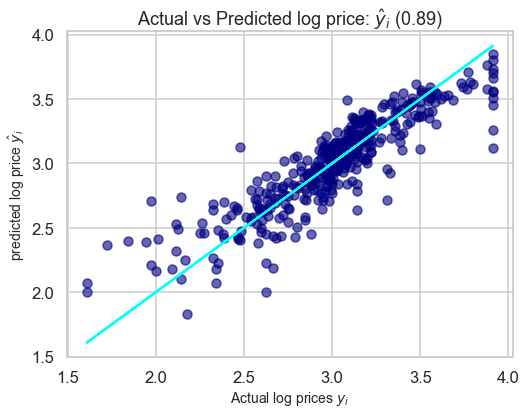

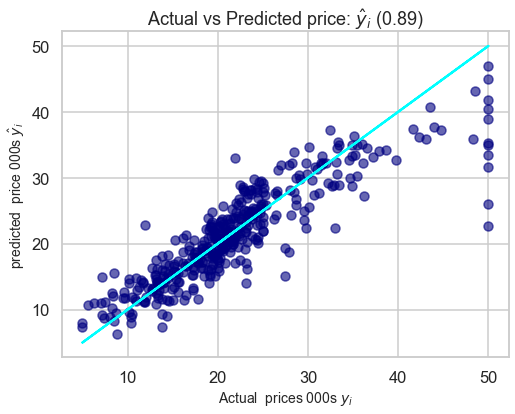

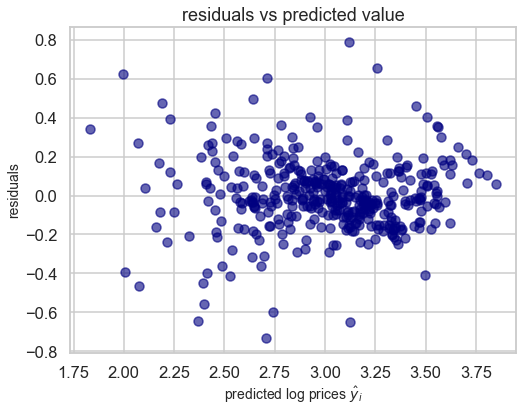

In [145]:
#RESIDUALS
#residuals = Y_train - results.fittedvalues

#>> difference bet target value and predicted value
#>> used to cheack if assumption hold and model is valid
#>>Residuals should be random(i.e. no pattern)
#>> REsiduals should be normally distrubuted

#>>in pdf normal distrubution , skew= 0, mean= 0


#residuals.describe()
#results.resid


#Modified model: transformed(using log price) and simlified(dropping two features)


prices = np.log(df_boston['PRICE']) #use log
features = df_boston.drop(['PRICE', 'INDUS', 'AGE'], axis= 1)
#we have to drop a column so for column axis=1 and axis = 0 for row

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size= 0.2, random_state= 10)

#USING STATSMODEL

x_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, x_incl_const)  #OLS= ortdinary Least square give linear regression model
results = model.fit()



#GRaph of Actual vs Predicted Prices

corr = round(Y_train.corr(results.fittedvalues), 2)
plt.figure(figsize= (8, 6))
plt.scatter(x=Y_train, y= results.fittedvalues, color= 'navy', alpha= 0.6)
plt.title(f'Actual vs Predicted log price: $\haty _i$ ({corr})')
plt.xlabel('Actual log prices $y _i$', fontsize= 14)
plt.ylabel('predicted log price $\haty _i$', fontsize= 14)
plt.plot(Y_train, Y_train, color= 'cyan')
plt.show()

plt.figure(figsize= (8, 6))
plt.scatter(x=np.e**Y_train, y= np.e**results.fittedvalues, color= 'navy', alpha= 0.6)
plt.title(f'Actual vs Predicted price: $\haty _i$ ({corr})')
plt.xlabel('Actual  prices 000s $y _i$', fontsize= 14)
plt.ylabel('predicted  price 000s $\haty _i$', fontsize= 14)
plt.plot(np.e**Y_train, np.e**Y_train, color= 'cyan')
plt.show()

#Residual vs Predicted values

plt.figure(figsize= (8, 6))
plt.scatter(x=results.fittedvalues, y= results.resid, color= 'navy', alpha= 0.6)
plt.title('residuals vs predicted value')
plt.xlabel('predicted log prices $\haty _i$', fontsize= 14)
plt.ylabel('residuals', fontsize= 14)

plt.show()


#Mean Squared Error
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

<Figure size 576x432 with 0 Axes>

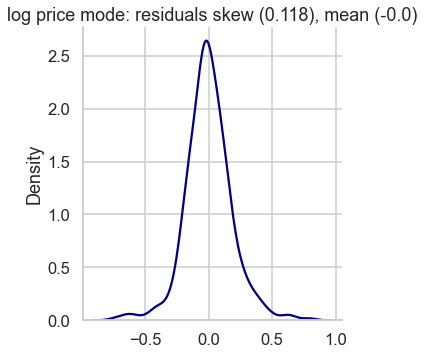

In [151]:
#distribution of Residuals (log prices) - cheacking normality 

resid_mean= round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)
plt.figure(figsize= (8, 6))
sns.displot(results.resid, color = 'navy', kind='kde' )
plt.title(f'log price mode: residuals skew ({resid_skew}), mean ({resid_mean})')
plt.show()

C:\Users\amar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


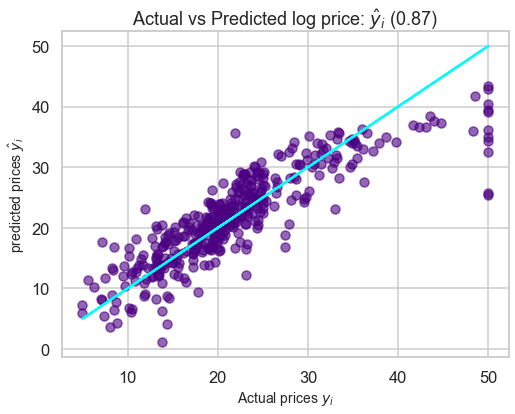

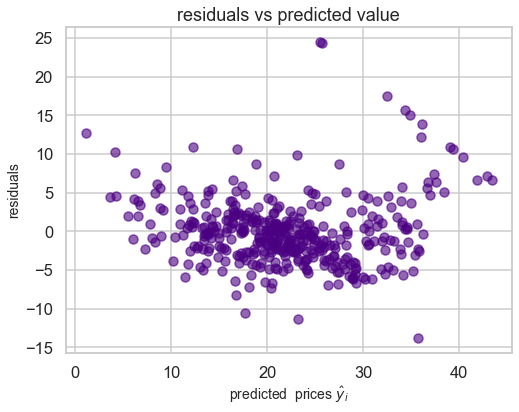

<Figure size 576x432 with 0 Axes>

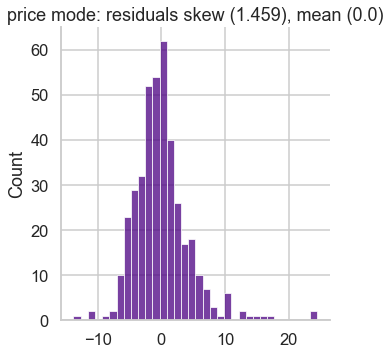

In [141]:
# Original  model: normal prices and all features


prices = df_boston['PRICE']
features = df_boston.drop(['PRICE'], axis= 1)
#we have to drop a column so for column axis=1 and axis = 0 for row

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size= 0.2, random_state= 10)



x_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, x_incl_const)  #OLS= ortdinary Least square give linear regression model
results = model.fit()

#RESIDUALS
#residuals = Y_train - results.fittedvalues
#residuals.describe()
#results.resid

#GRaph of Actual vs Predicted Prices

corr = round(Y_train.corr(results.fittedvalues), 2)
plt.figure(figsize= (8, 6))
plt.scatter(x=Y_train, y= results.fittedvalues, color= 'indigo', alpha= 0.6)
plt.title(f'Actual vs Predicted log price: $\haty _i$ ({corr})')
plt.xlabel('Actual prices $y _i$', fontsize= 14)
plt.ylabel('predicted prices $\haty _i$', fontsize= 14)
plt.plot(Y_train, Y_train, color= 'cyan')
plt.show()

#Residual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(x=results.fittedvalues, y= results.resid, color= 'indigo', alpha= 0.6)
plt.title('residuals vs predicted value')
plt.xlabel('predicted  prices $\haty _i$', fontsize= 14)
plt.ylabel('residuals', fontsize= 14)

plt.show()

#Residual Distribution chart
#distribution of Residuals (log prices) - cheacking normality 

resid_mean= round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

plt.figure(figsize=(8, 6))
sns.displot(results.resid, color = 'indigo')
plt.title(f'price mode: residuals skew ({resid_skew}), mean ({resid_mean})')
plt.show()


#Mean Squared Error

full_normal_mse = round(results.mse_resid, 3)
full_normal_rsquared = round(results.rsquared, 3)

C:\Users\amar\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


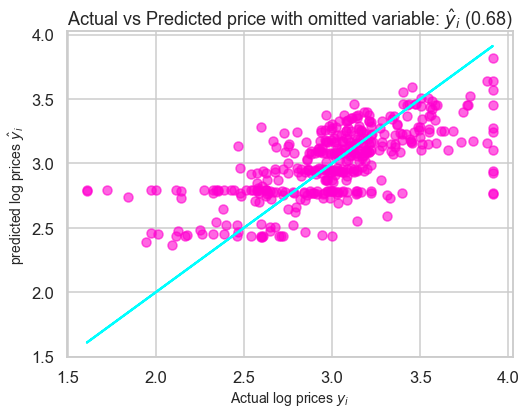

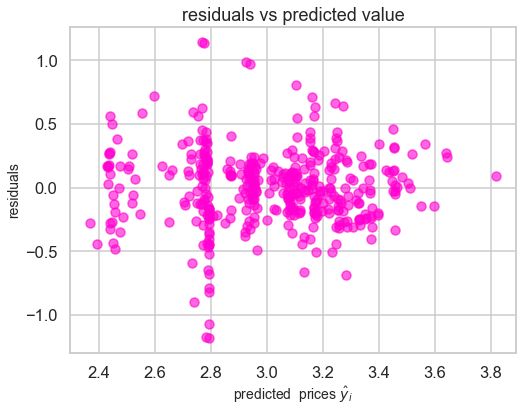

In [142]:
# model omitting key features using log price


prices = np.log(df_boston['PRICE'])
features = df_boston.drop(['PRICE', 'INDUS', 'RM', 'AGE', 'LSTAT', 'NOX', 'CRIM'], axis= 1)
#we have to drop a column so for column axis=1 and axis = 0 for row

X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size= 0.2, random_state= 10)



x_incl_const = sm.add_constant(X_train)
model = sm.OLS(Y_train, x_incl_const)  #OLS= ortdinary Least square give linear regression model
results = model.fit()

#RESIDUALS
#residuals = Y_train - results.fittedvalues
#residuals.describe()
#results.resid

#GRaph of Actual vs Predicted Prices

corr = round(Y_train.corr(results.fittedvalues), 2)
plt.figure(figsize= (8, 6))
plt.scatter(x=Y_train, y= results.fittedvalues, color= '#ff00d0', alpha= 0.6)
plt.title(f'Actual vs Predicted price with omitted variable: $\haty _i$ ({corr})')
plt.xlabel('Actual log prices $y _i$', fontsize= 14)
plt.ylabel('predicted log prices $\haty _i$', fontsize= 14)
plt.plot(Y_train, Y_train, color= 'cyan')
plt.show()

#Residual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(x=results.fittedvalues, y= results.resid, color= '#ff00d0', alpha= 0.6)
plt.title('residuals vs predicted value')
plt.xlabel('predicted  prices $\haty _i$', fontsize= 14)
plt.ylabel('residuals', fontsize= 14)

plt.show()


#Mean Squared Error

omitted_var_mse = round(results.mse_resid, 3)
omitted_var_rsquared = round(results.rsquared, 3)

In [156]:
X_train.shape

(404, 11)

In [159]:
Y_train.shape

(404,)

In [144]:
#CHALLENGE: our estimate for house price is $30,000. calculate the lower and upper bound
#for a 95% prediction interval using the reduce log method

print('1 s.d. in log price is', np.sqrt(reduced_log_mse))
print('2 s.d. in log price is', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)  # y hay + 2*rmse

print('the upper bound in log price for 95% prediction interval is ', upper_bound)
print('the upper bound in the normal price is $', np.e**upper_bound*1000)

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)

print('the lower bound in log price for 95% prediction interval is ', lower_bound)
print('the lower bound in the normal price is $', np.e**lower_bound*1000)

1 s.d. in log price is 0.18708286933869708
2 s.d. in log price is 0.5612486080160912
the upper bound in log price for 95% prediction interval is  3.7753631203395495
the upper bound in the normal price is $ 43613.34233239937
the lower bound in log price for 95% prediction interval is  3.0270316429847615
the lower bound in the normal price is $ 20635.886906824155


In [ ]:
#RootMeanSquareError is very important, we can find ranhe of lower and upper bound of our estimation
# by RMSE we can also conclude how accurate our prediction is in contrast to r-squared value.
#r-squared value doesnt tell us about how accurate our prediction is.


## Valuation tools